# Cryptocurrency Liquidity Prediction for Market Stability

**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training 
* Choose best model

## Problem statement.

* Cryptocurrency markets are highly volatile, and liquidity plays a crucial role in market stability. Liquidity refers to the ease with which assets can be bought or sold without significantly impacting the price. A lack of liquidity can lead to increased price fluctuations and market instability.

* In this project, you are required to build a machine learning model to predict cryptocurrency liquidity levels based on various market factors such as trading volume, transaction patterns, exchange listings, and social media activity. The objective is to detect liquidity crises early to help traders and exchange platforms manage risks effectively.

* Your final model should provide insights into market stability by forecasting liquidity variations, allowing traders and financial institutions to make informed decisions

##  1. Data Collection
- The dataset is downloaded from https://drive.google.com/drive/folders/10BRgPip2Zj_56is3DilJCowjfyT6E9AM


##  2. Data Preprocessing: Handle missing values, clean data, and normalize numerical features


### Import required libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt

warnings.filterwarnings('ignore')

### Set pandas default option

In [5]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)


### Import the csv data

In [6]:
df1 = pd.read_csv('data\coin_gecko_2022-03-16.csv')
df2 = pd.read_csv('data\coin_gecko_2022-03-17.csv')
df = pd.concat([df1,df2],ignore_index=True)
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16
...,...,...,...,...,...,...,...,...,...
995,IRISnet,IRIS,0.055426,0.016,-0.003,-0.088,2.976839e+06,6.809024e+07,2022-03-17
996,Circuits of Value,COVAL,0.037961,0.002,-0.012,-0.054,3.667870e+05,6.782627e+07,2022-03-17
997,ARPA Chain,ARPA,0.069003,-0.000,0.008,-0.037,1.363376e+07,6.776284e+07,2022-03-17
998,SuperRare,RARE,0.464613,-0.003,0.014,0.019,9.398219e+06,6.738822e+07,2022-03-17


### Display the data details

In [7]:
print("Data head")
df.head(5)

Data head


,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [8]:
print("Data shape")
df.shape

Data shape


(1000, 9)

In [9]:
print("Data information")
df.info()

Data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        1000 non-null   object 
 1   symbol      1000 non-null   object 
 2   price       1000 non-null   float64
 3   1h          993 non-null    float64
 4   24h         993 non-null    float64
 5   7d          992 non-null    float64
 6   24h_volume  993 non-null    float64
 7   mkt_cap     1000 non-null   float64
 8   date        1000 non-null   object 
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


In [10]:
print("Summary of dataset")
df.describe()

Summary of dataset


,price,1h,24h,7d,24h_volume,mkt_cap
count,1.000000e+03,993.000000,993.000000,992.000000,9.930000e+02,1.000000e+03
mean,6.561060e+02,0.009723,0.023737,0.023558,2.893109e+08,3.755304e+09
std,4.584655e+03,0.026934,0.059303,0.229781,2.769908e+09,3.803783e+10
min,1.484000e-09,-0.704000,-0.646000,-0.558000,0.000000e+00,6.577043e+07
25%,1.940547e-01,0.001000,0.001000,-0.041000,1.766976e+06,1.157776e+08
50%,1.095000e+00,0.006000,0.016000,-0.000500,8.343005e+06,2.120036e+08
75%,7.232500e+00,0.019000,0.035000,0.037000,4.003652e+07,5.948436e+08
max,4.121727e+04,0.095000,0.577000,4.608000,5.793497e+10,7.760774e+11


### Check the null values

In [11]:
df.isnull().sum()

coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64

In [12]:
df[df['7d'].isnull()]

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
310,BNB48 Club Token,KOGE,75.360000,NaN,NaN,NaN,NaN,151006279.0,2022-03-16
416,cBAT,CBAT,0.013888,NaN,NaN,NaN,NaN,96585801.0,2022-03-16
472,Sai,SAI,1.000000,NaN,NaN,NaN,NaN,72643253.0,2022-03-16
603,ApeCoin,APE,7.720000,0.05,-0.255,NaN,1.129583e+09,794922002.0,2022-03-17
772,Interest Bearing Bitcoin,IBBTC,40853.810000,NaN,NaN,NaN,NaN,189800862.0,2022-03-17
814,BNB48 Club Token,KOGE,75.360000,NaN,NaN,NaN,NaN,151006279.0,2022-03-17
918,cBAT,CBAT,0.013888,NaN,NaN,NaN,NaN,96581377.0,2022-03-17
975,Sai,SAI,1.000000,NaN,NaN,NaN,NaN,72643253.0,2022-03-17


### For 8 data rows most of the fields are having null values. These 8 rows can be dropped

In [13]:
df_cleaned = df.dropna()
df_cleaned.shape

(992, 9)

In [14]:
df_cleaned.isnull().sum()

coin          0
symbol        0
price         0
1h            0
24h           0
7d            0
24h_volume    0
mkt_cap       0
date          0
dtype: int64

### Convert the date field into pandas datetime format

In [15]:
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'],format='%Y-%m-%d')

In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   coin        992 non-null    object        
 1   symbol      992 non-null    object        
 2   price       992 non-null    float64       
 3   1h          992 non-null    float64       
 4   24h         992 non-null    float64       
 5   7d          992 non-null    float64       
 6   24h_volume  992 non-null    float64       
 7   mkt_cap     992 non-null    float64       
 8   date        992 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 77.5+ KB


### Check duplicate value

In [25]:
df_cleaned.duplicated().sum()

np.int64(0)

### Define numerical & categorical features

In [17]:
#As the symbol column has no meaning in the prediction, we can drop

columns = [col for col in df_cleaned.columns if col!='symbol']
print(columns)


num_features =  [col for col in columns if df_cleaned[col].dtype!='O']
cat_features =  [col for col in columns if df_cleaned[col].dtype=='O']
                 
print(f"Numerical features {num_features}")
print(f"Categorical features {cat_features}")


['coin', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'date']
Numerical features ['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'date']
Categorical features ['coin']


In [18]:
### Check the categorical features

for feature in cat_features:
    print(f"Feature {feature} has {len(df_cleaned[feature].unique())} unique values")

Feature coin has 502 unique values


### Univariate analysis

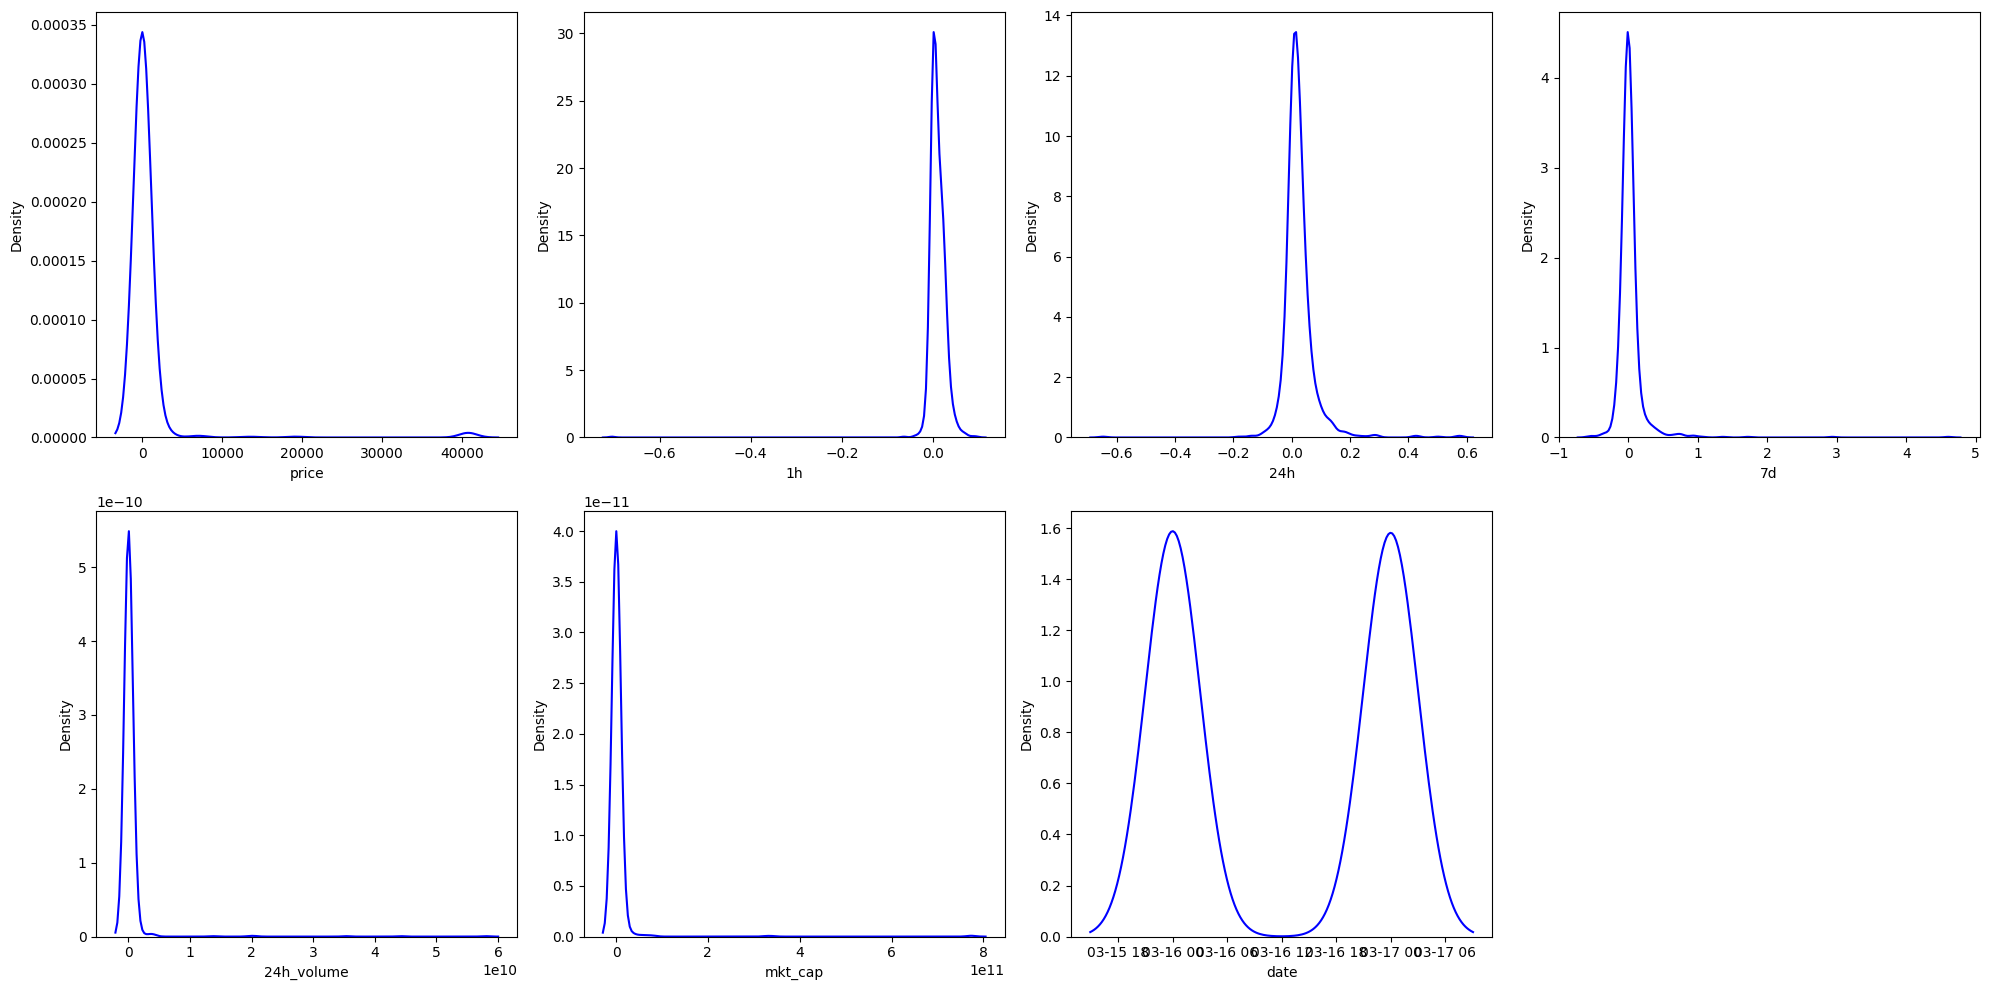

In [19]:
plt.figure(figsize=(20,10))

i=0
for col in num_features:
    plt.subplot(2,4,i+1)
    sns.kdeplot(x=df_cleaned[col],color='blue')
    plt.xlabel(col)
    plt.tight_layout()
    i+=1

### Univariate report

* Most of the prices are less than 10,000 with few outliers at 40,000 range

### Bivariate analysis

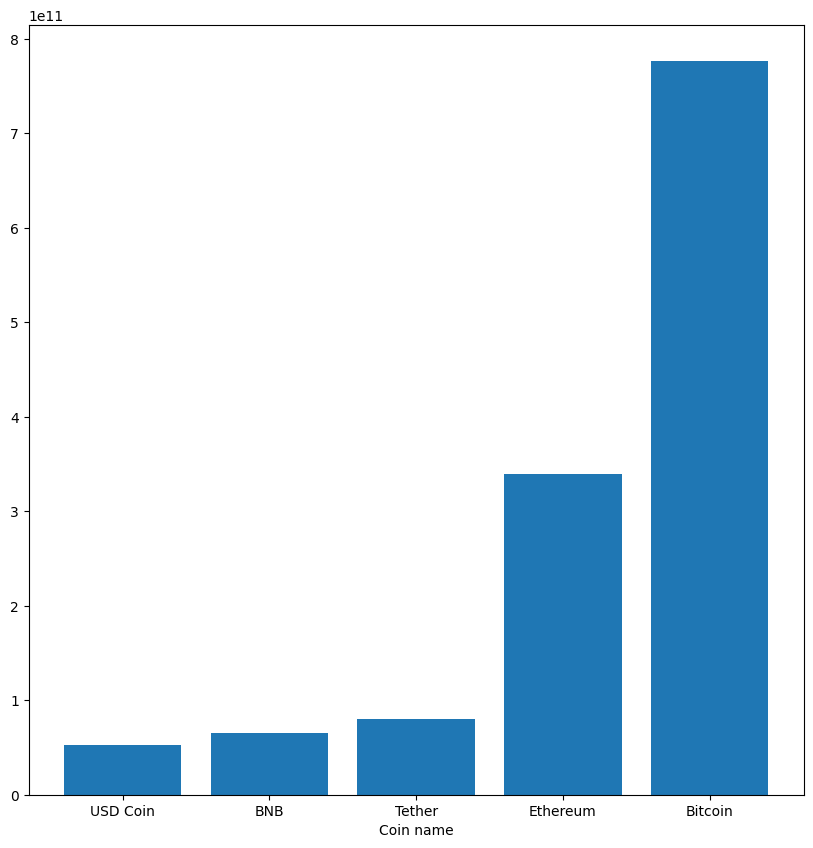

In [20]:
df_mkt_cap_sorted = df.sort_values('mkt_cap')
plt.figure(figsize=(10,10))
plt.bar(df_mkt_cap_sorted['coin'][-10:],df_mkt_cap_sorted['mkt_cap'][-10:])
plt.xlabel('Coin name')
plt.show('Market cap')

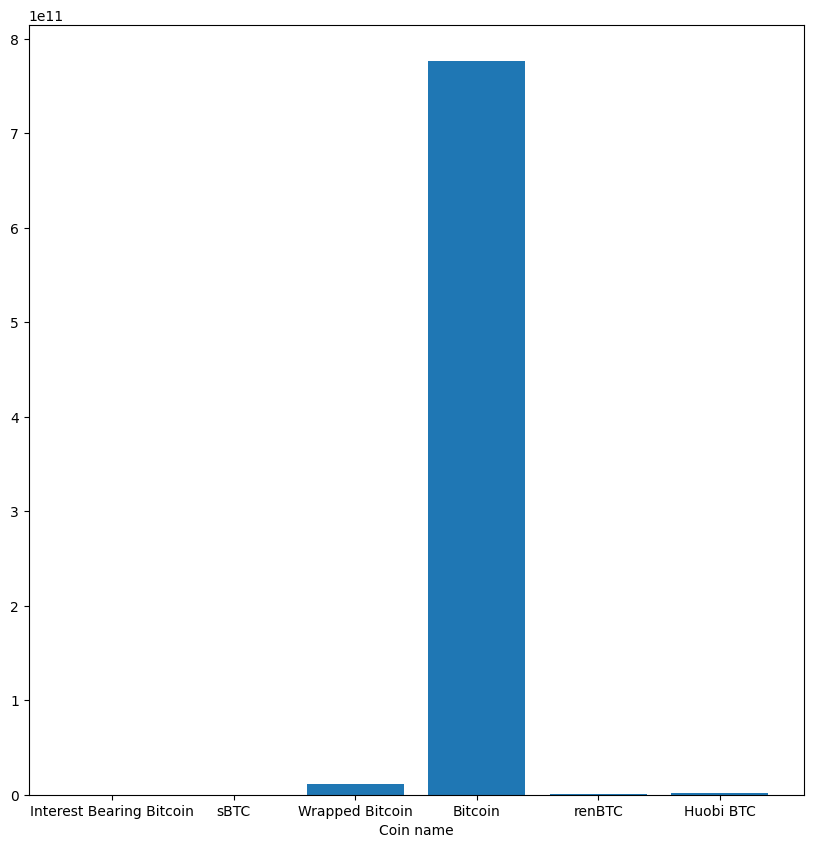

In [21]:
df_mkt_cap_sorted = df.sort_values('price')
plt.figure(figsize=(10,10))
plt.bar(df_mkt_cap_sorted['coin'][-10:],df_mkt_cap_sorted['mkt_cap'][-10:])
plt.xlabel('Coin name')
plt.show('Market cap')

### Outliers

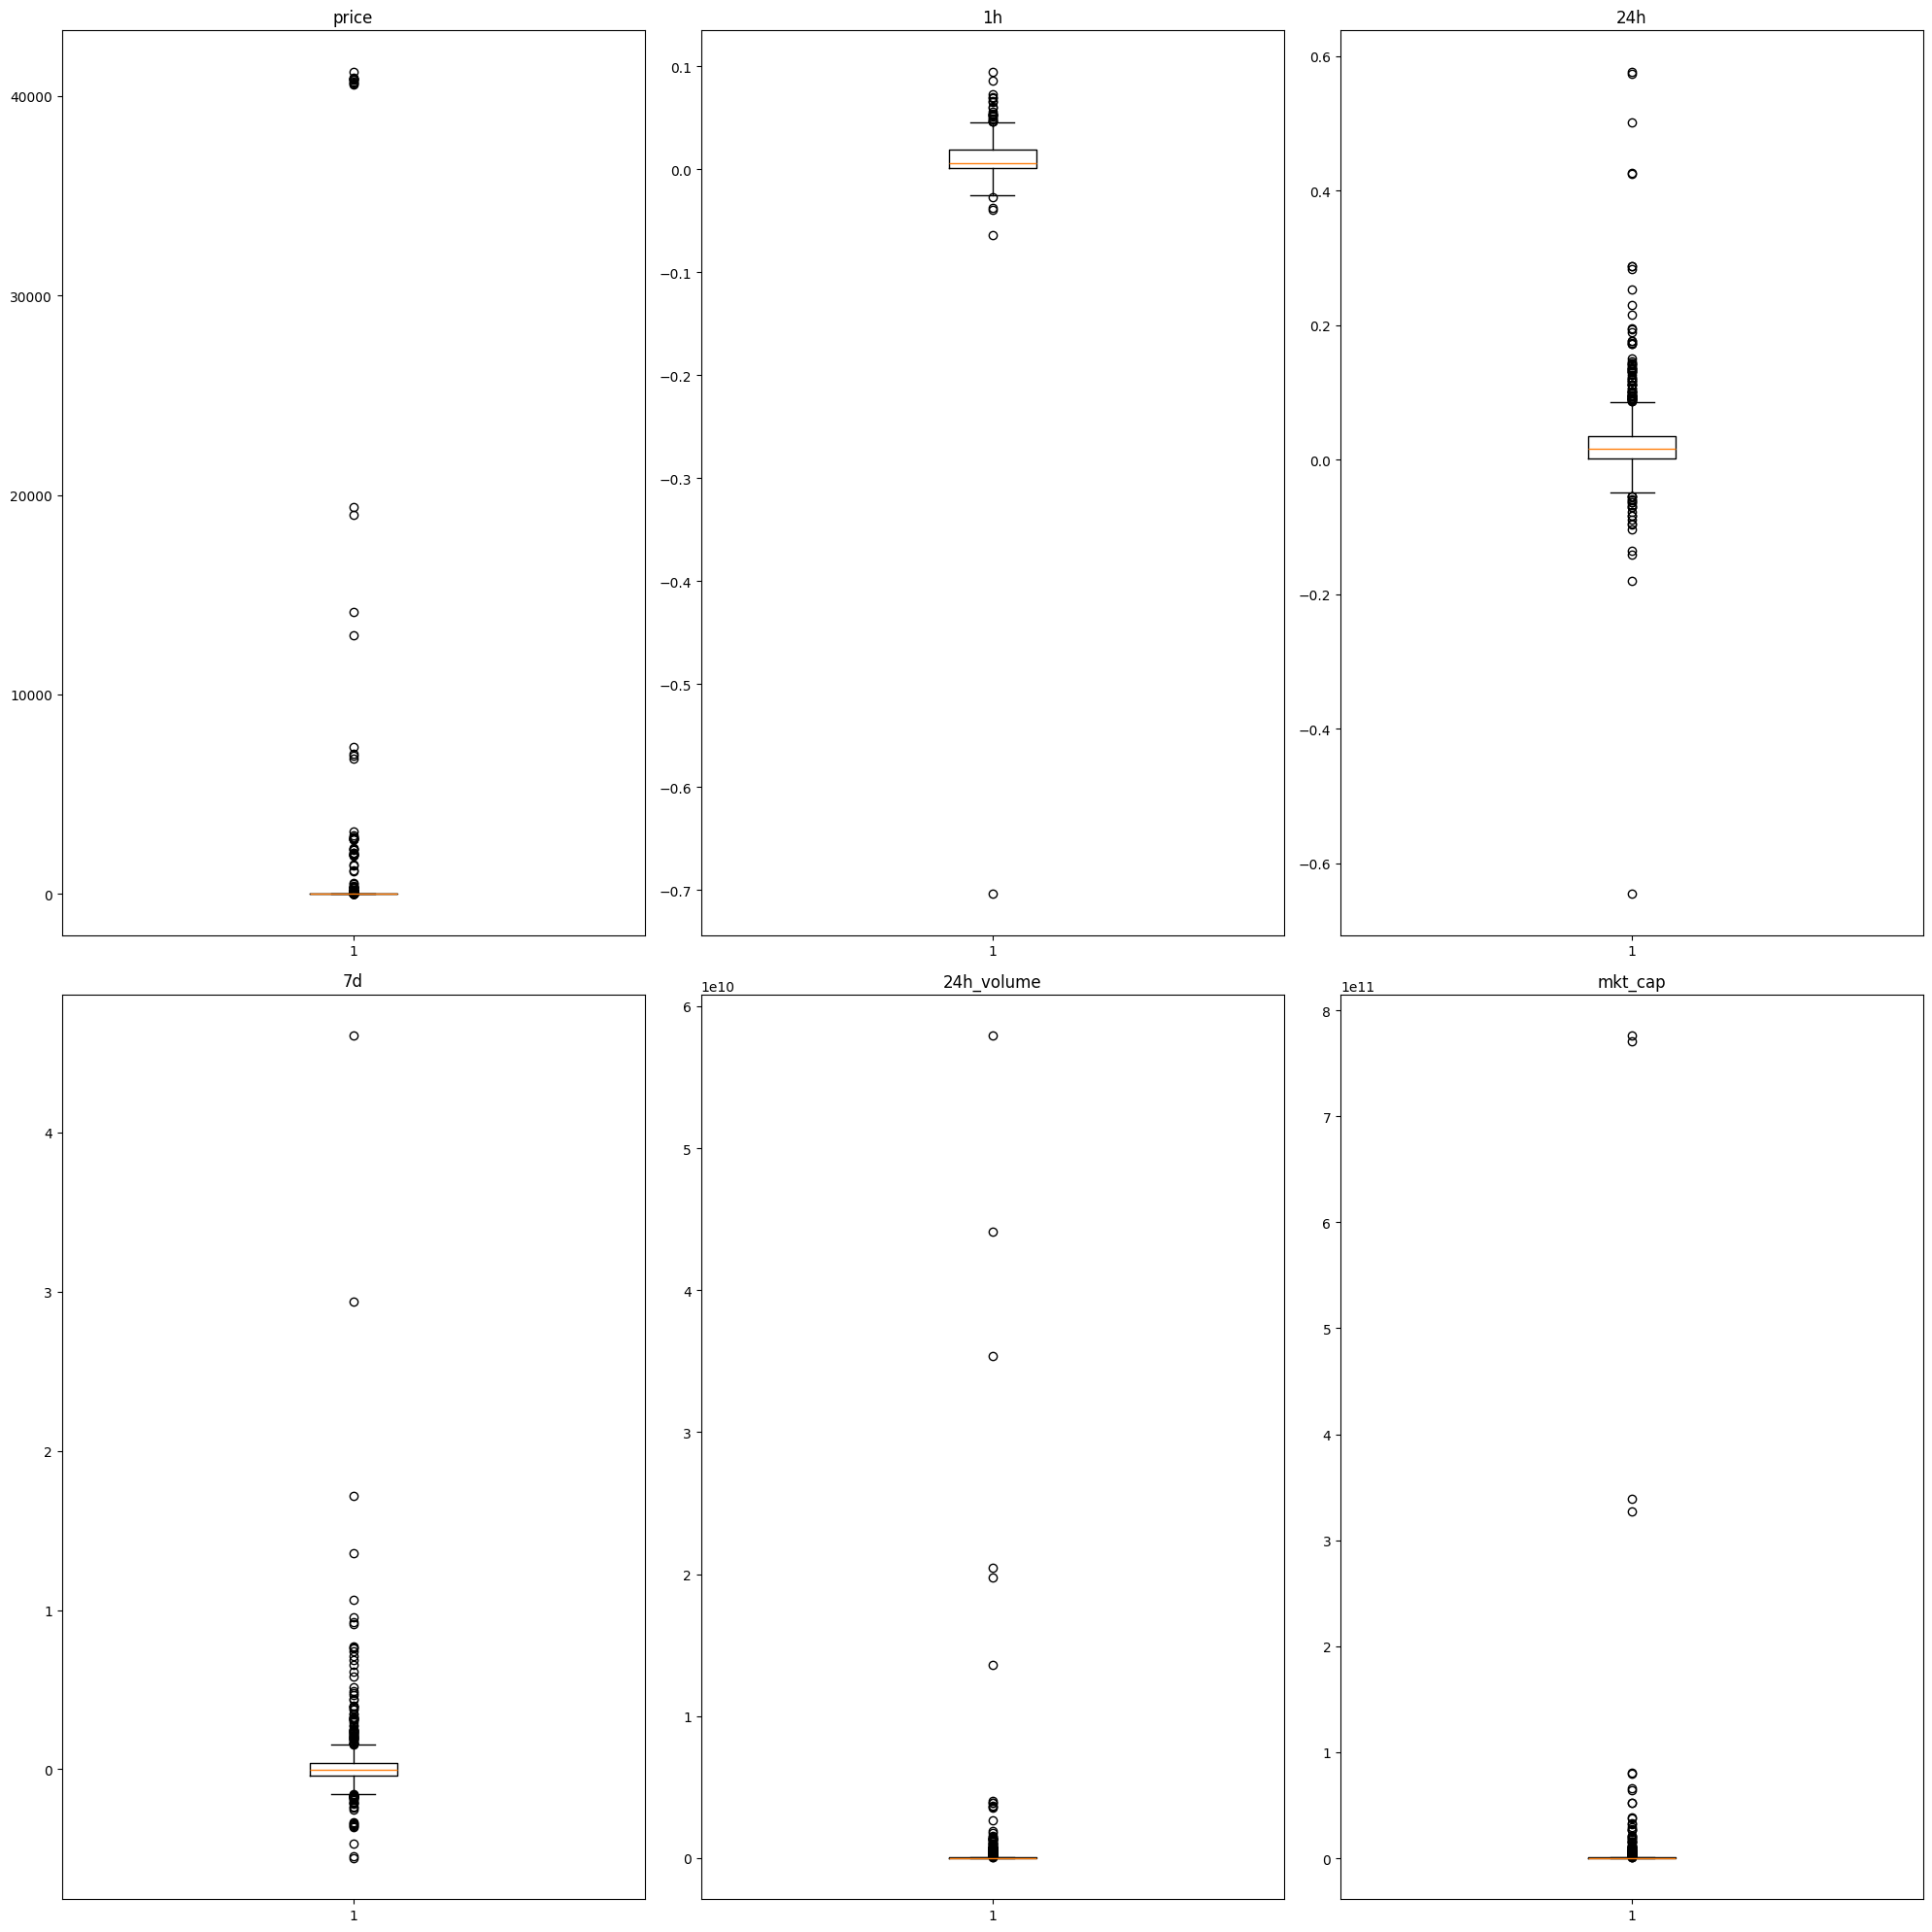

In [40]:
plt.figure(figsize=(20, 20))

features = ['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap']
i = 1  
for col in features:
    plt.subplot(2, 3, i) 
    plt.boxplot(df_cleaned[col])
    plt.title(col)  
    i += 1

plt.tight_layout()
plt.show()

* All the fields are having outliers, but as the data is real time & volume price are actually having variations, not doing any outlier treatment

### Bivariate report

* Bitcoin is having the highest market cap, followed by etherium
* Bitcoin is having the hiighest price, followed bywrapped bit coin & Huobi BTC

### Multivariate analysis

* check multi colinearity in the feature


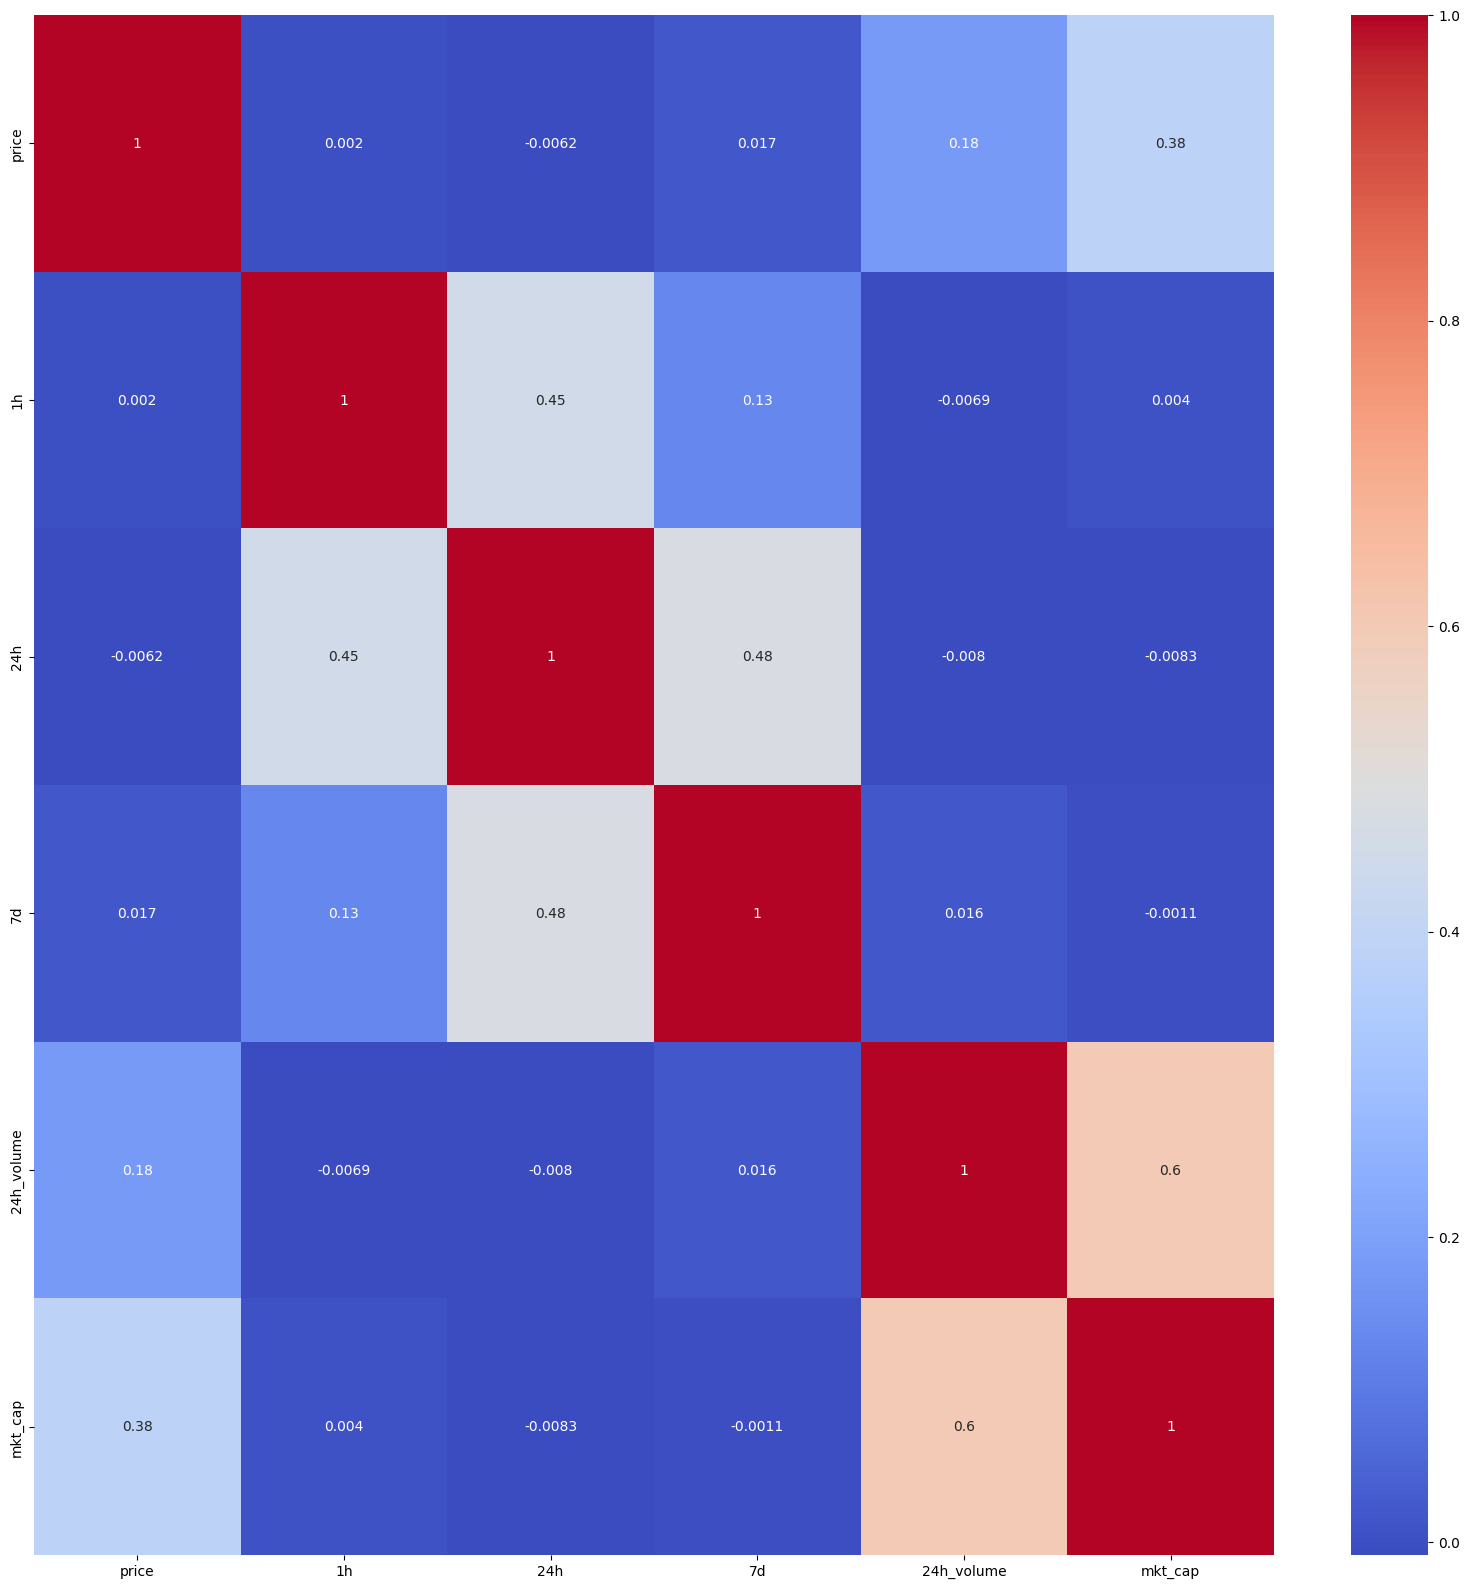

In [22]:
plt.figure(figsize=(20,20))
df_numeric = df_cleaned.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(),annot=True,cmap='coolwarm')
plt.show()

### Multivariate report

* market cap is having the highest correlation with 24h volume = 0.6

## 4. Feature Engineering

### VIF  analysis

In [24]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    """Calculates Variance Inflation Factor (VIF) for each numerical feature in the DataFrame."""
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    
    # Drop missing values to avoid errors
    numeric_df = numeric_df.dropna()

    # Create a new DataFrame to store VIF values
    vif_data = pd.DataFrame()
    vif_data["Feature"] = numeric_df.columns
    vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

    return vif_data

df_numeric = df_cleaned.select_dtypes(include=['number']).copy()
calculate_vif(df_numeric)

,Feature,VIF
0,price,1.186318
1,1h,1.392297
2,24h,1.763021
3,7d,1.320327
4,24h_volume,1.580115
5,mkt_cap,1.792764


* As the VIF is less than 5 so dta has not much correlations

### Create relevant liquidity-related features such as 
* moving averages
* volatility
* liquidity ratios

In [27]:
df_cleaned['moving_averages'] = df_cleaned['price'].rolling(window=7).mean()
df_cleaned['volatility'] = df_cleaned['price'].rolling(window=7).std()
df_cleaned['liquidity_ratio'] = df_cleaned['24h_volume'] / df_cleaned['mkt_cap']

In [ ]:
features = [
    'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap',
    'moving_averages','volatility','liquidity_ratio']
X = df1[features]
y = df1['liquidity_level']

### 5. Model Selection: Choose appropriate machine learning models such as 
* time-series forecasting 
* regression
* deep learning approaches

### Sclaing

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

